<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/explore_nbs/Explore_GPU_MNIST_Tiny_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install fastai2 --upgrade > /dev/null

In [ ]:
from fastai2.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST_TINY)

In [ ]:
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(),
    item_tfms=Resize(28),
    batch_tfms=[]
)

In [ ]:
datablock.summary(path)

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_tiny/train/3/7569.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /root/.fastai/data/mnist_tiny/train/3/7569.png
    applying parent_label gives
      3
    applying Categorize gives
      TensorCategory(0)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(0))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=28x28, TensorCategory(0))
    applying Resize gives
      (PILImageBW mode=L size=28x28, TensorCa

In [ ]:
dls = datablock.dataloaders(path)

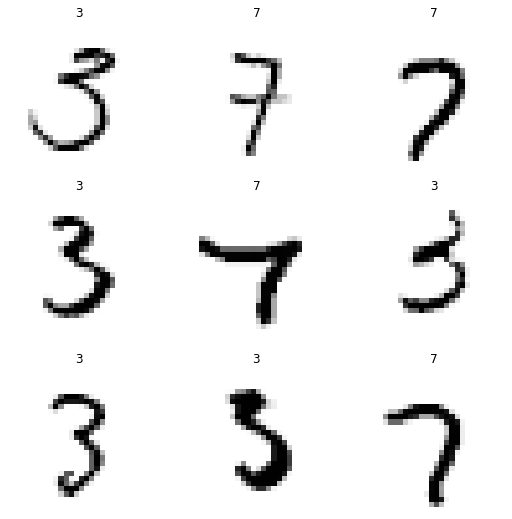

In [ ]:
dls.show_batch()

In [ ]:
learner = cnn_learner(dls, resnet18, metrics=accuracy, opt_func=SGD)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [ ]:
learner.summary()

Sequential (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 14 x 14    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 14 x 14    128        True      
________________________________________________________________
ReLU                 64 x 64 x 14 x 14    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 7 x 7      0          False     
________________________________________________________________
Conv2d               64 x 64 x 7 x 7      36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 7 x 7      128        True      
________________________________________________________________
ReLU                 64 x 64 x 7 x 7      0          False     
___________________________________________________

In [ ]:
learner.fit(1,lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.275509,0.839669,0.510730,00:03


In [ ]:
learner.fit(100,lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.989523,0.934539,0.506438,00:02
1,1.097201,0.868814,0.520744,00:02
2,1.027274,0.760649,0.567954,00:02
3,0.995332,0.681386,0.620887,00:02
4,0.969244,0.617322,0.655222,00:02
5,0.941833,0.578212,0.693848,00:02
6,0.919471,0.541018,0.723891,00:02
7,0.869387,0.515558,0.739628,00:02
8,0.837093,0.490624,0.748212,00:02
9,0.802864,0.468790,0.771102,00:02


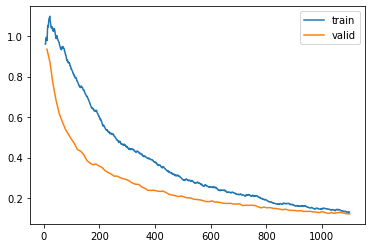

In [ ]:
learner.recorder.plot_loss()

In [ ]:
learner.save('100epoch')

In [ ]:
!mkdir -p /content/drive/My\ Drive/fastai_v4/models/mnist_tiny_resnet18
!cp /content/models/100epoch.pth /content/drive/My\ Drive/fastai_v4/models/mnist_tiny_resnet18/.